In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [4]:
df5=pd.read_csv('bengaluru.csv')
df5.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df5=df5.drop(['area_type','availability','society'],axis='columns')
df5.head(5)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
def is_float(x):
    try:
        float(x)
    except:
         return False
    return True

In [8]:
df5[~df5['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Devanahalli,1 BHK,1020 - 1130,NaN,NaN,52.570
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135


In [9]:
df5['total_sqft']=df5['total_sqft'].apply(convert_to)

NameError: name 'convert_to' is not defined

In [10]:
convert_to(2830 - 2882)

NameError: name 'convert_to' is not defined

In [11]:
df5['bath'].fillna(df5.bath.mean())

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [13]:
df5['size'].astype('str').str

In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [15]:
df6=df5.copy()
df6['total_sqft']=df6['total_sqft'].apply(convert_sqft_to_num).astype(float)

In [ ]:
df6

In [16]:
df6['size'].apply(lambda x: str(x))

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [ ]:
df6['size'].apply(lambda x: x.split())

In [17]:
df6['bhk']=df6['size'].replace('[^\d.]','',regex=True)
df6


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,NaN,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [18]:
df7 = df6.copy()
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
df7.size


In [19]:
df7.location.str.strip('')

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [20]:
df7['bhk']=df7['size'].replace('[^\d.]','',regex=True)
df7


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,NaN,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [ ]:
df7.dtypes

In [ ]:
df7.size

In [21]:
df7.location.apply(lambda x: str(x))

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [22]:
df7.location.dropna()

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13319, dtype: object

In [23]:
df7['location']=df7['location'].apply(lambda x: str(x))

In [24]:
df7['location'].apply(lambda x: x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [26]:
locstat=df7.location.value_counts(ascending=False)
locstat

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [27]:
locstat.values.sum()

13320

In [28]:
locstat_less=locstat[locstat<10]
locstat_less

Mathikere                         9
Lingarajapuram                    9
Chandra Layout                    9
2nd Phase JP Nagar                9
Vishwanatha Nagenahalli           9
                                 ..
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Uvce Layout                       1
Abshot Layout                     1
Name: location, Length: 1053, dtype: int64

In [29]:
locstat_more=locstat[locstat>=10]
locstat_more


Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
                  ... 
Ganga Nagar         10
Dairy Circle        10
Sadashiva Nagar     10
Nagadevanahalli     10
Gunjur Palya        10
Name: location, Length: 253, dtype: int64

In [30]:
df7['location']=df7['location'].apply(lambda x: 'other' if  x in locstat_less else x)
df7

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,NaN,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [31]:
df7['bhk']=df7['bhk'].apply(lambda x: float(x))
df8=df7[~(df7.total_sqft/df7.bhk<300)]
df8

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,NaN,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4.0,10407.336319


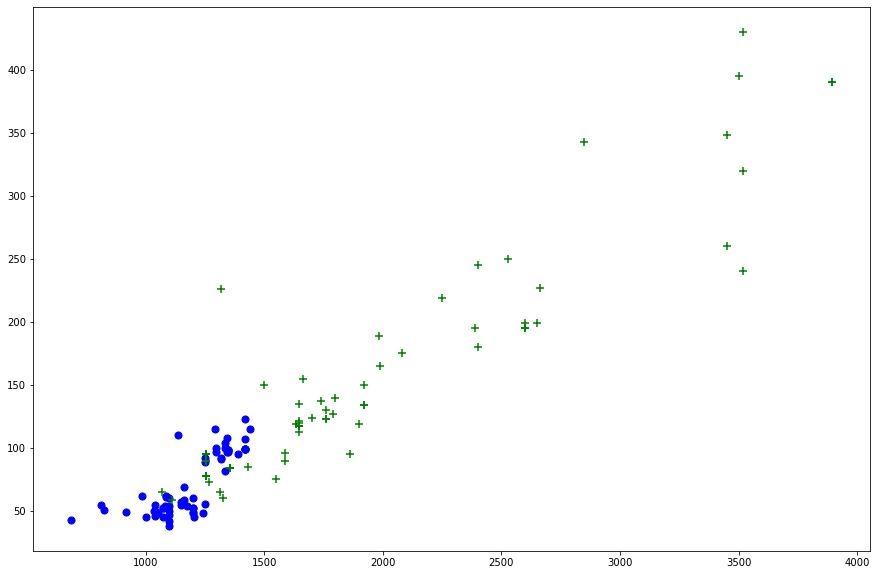

In [32]:
def plot_chart(df,location):
    bhk5=df[(df.location==location) & (df.bhk==2)]
    bhk6=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk5.total_sqft,bhk5.price,color='blue',s=50)
    plt.scatter(bhk6.total_sqft,bhk6.price,color='green',marker='+',s=50)
    
plot_chart(df8,"Hebbal")  

In [ ]:
np.array([])

In [33]:
df8.shape[0]

12576

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)

In [40]:
df9.shape

(8854, 8)

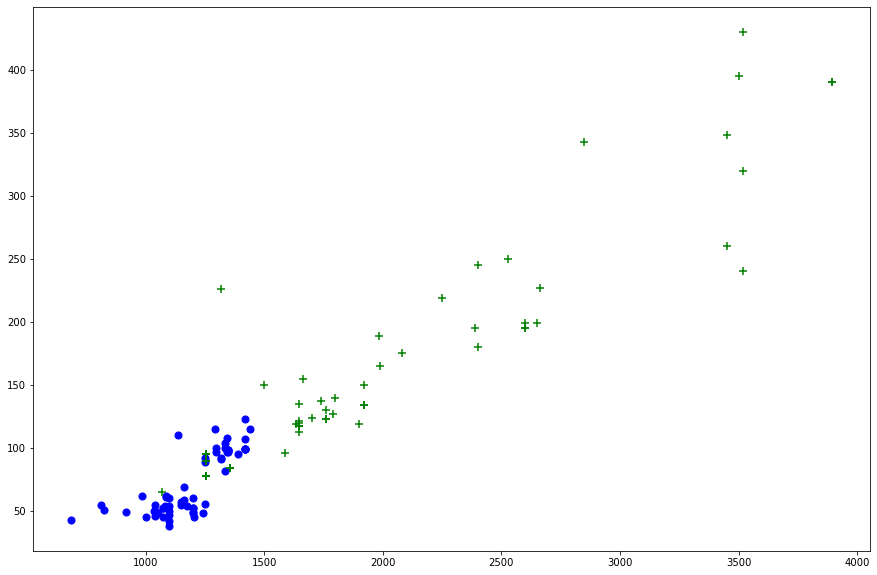

In [35]:
plot_chart(df9,"Hebbal")  

In [36]:
df99=df9[df9.bath<df9.bhk+2]
df99

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
6,Old Airport Road,4 BHK,2732.0,4.0,NaN,204.00,4.0,7467.057101
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3.0,6530.612245
13316,other,4 BHK,3600.0,5.0,NaN,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [42]:
df10 = df99.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0


In [43]:
dummies5=pd.get_dummies(df10.location)
dummies5

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df77=pd.concat([df10,dummies5.drop('other',axis='columns')],axis='columns')
df77.balcony.fillna(method='ffill',inplace=True)

In [61]:
df66=df77.drop('location',axis='columns')
df88=df66.drop(['price'],axis='columns')
df88.head()

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,1.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x=df88.fillna(method='ffill')
x.shape

(8674, 257)

In [64]:
y=df77.price
len(y)

8674

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linear=LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.6166743387176977

In [ ]:
df88.fillna

df77.fillna


In [ ]:
x.shape

In [ ]:
y.shape


In [ ]:
y


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_

In [ ]:
dum=pd.get_dummies(df77.location)
dum

In [ ]:
df88.info()

In [ ]:
np.all(np.isinfinte(df88))